pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0
pesos
1.0


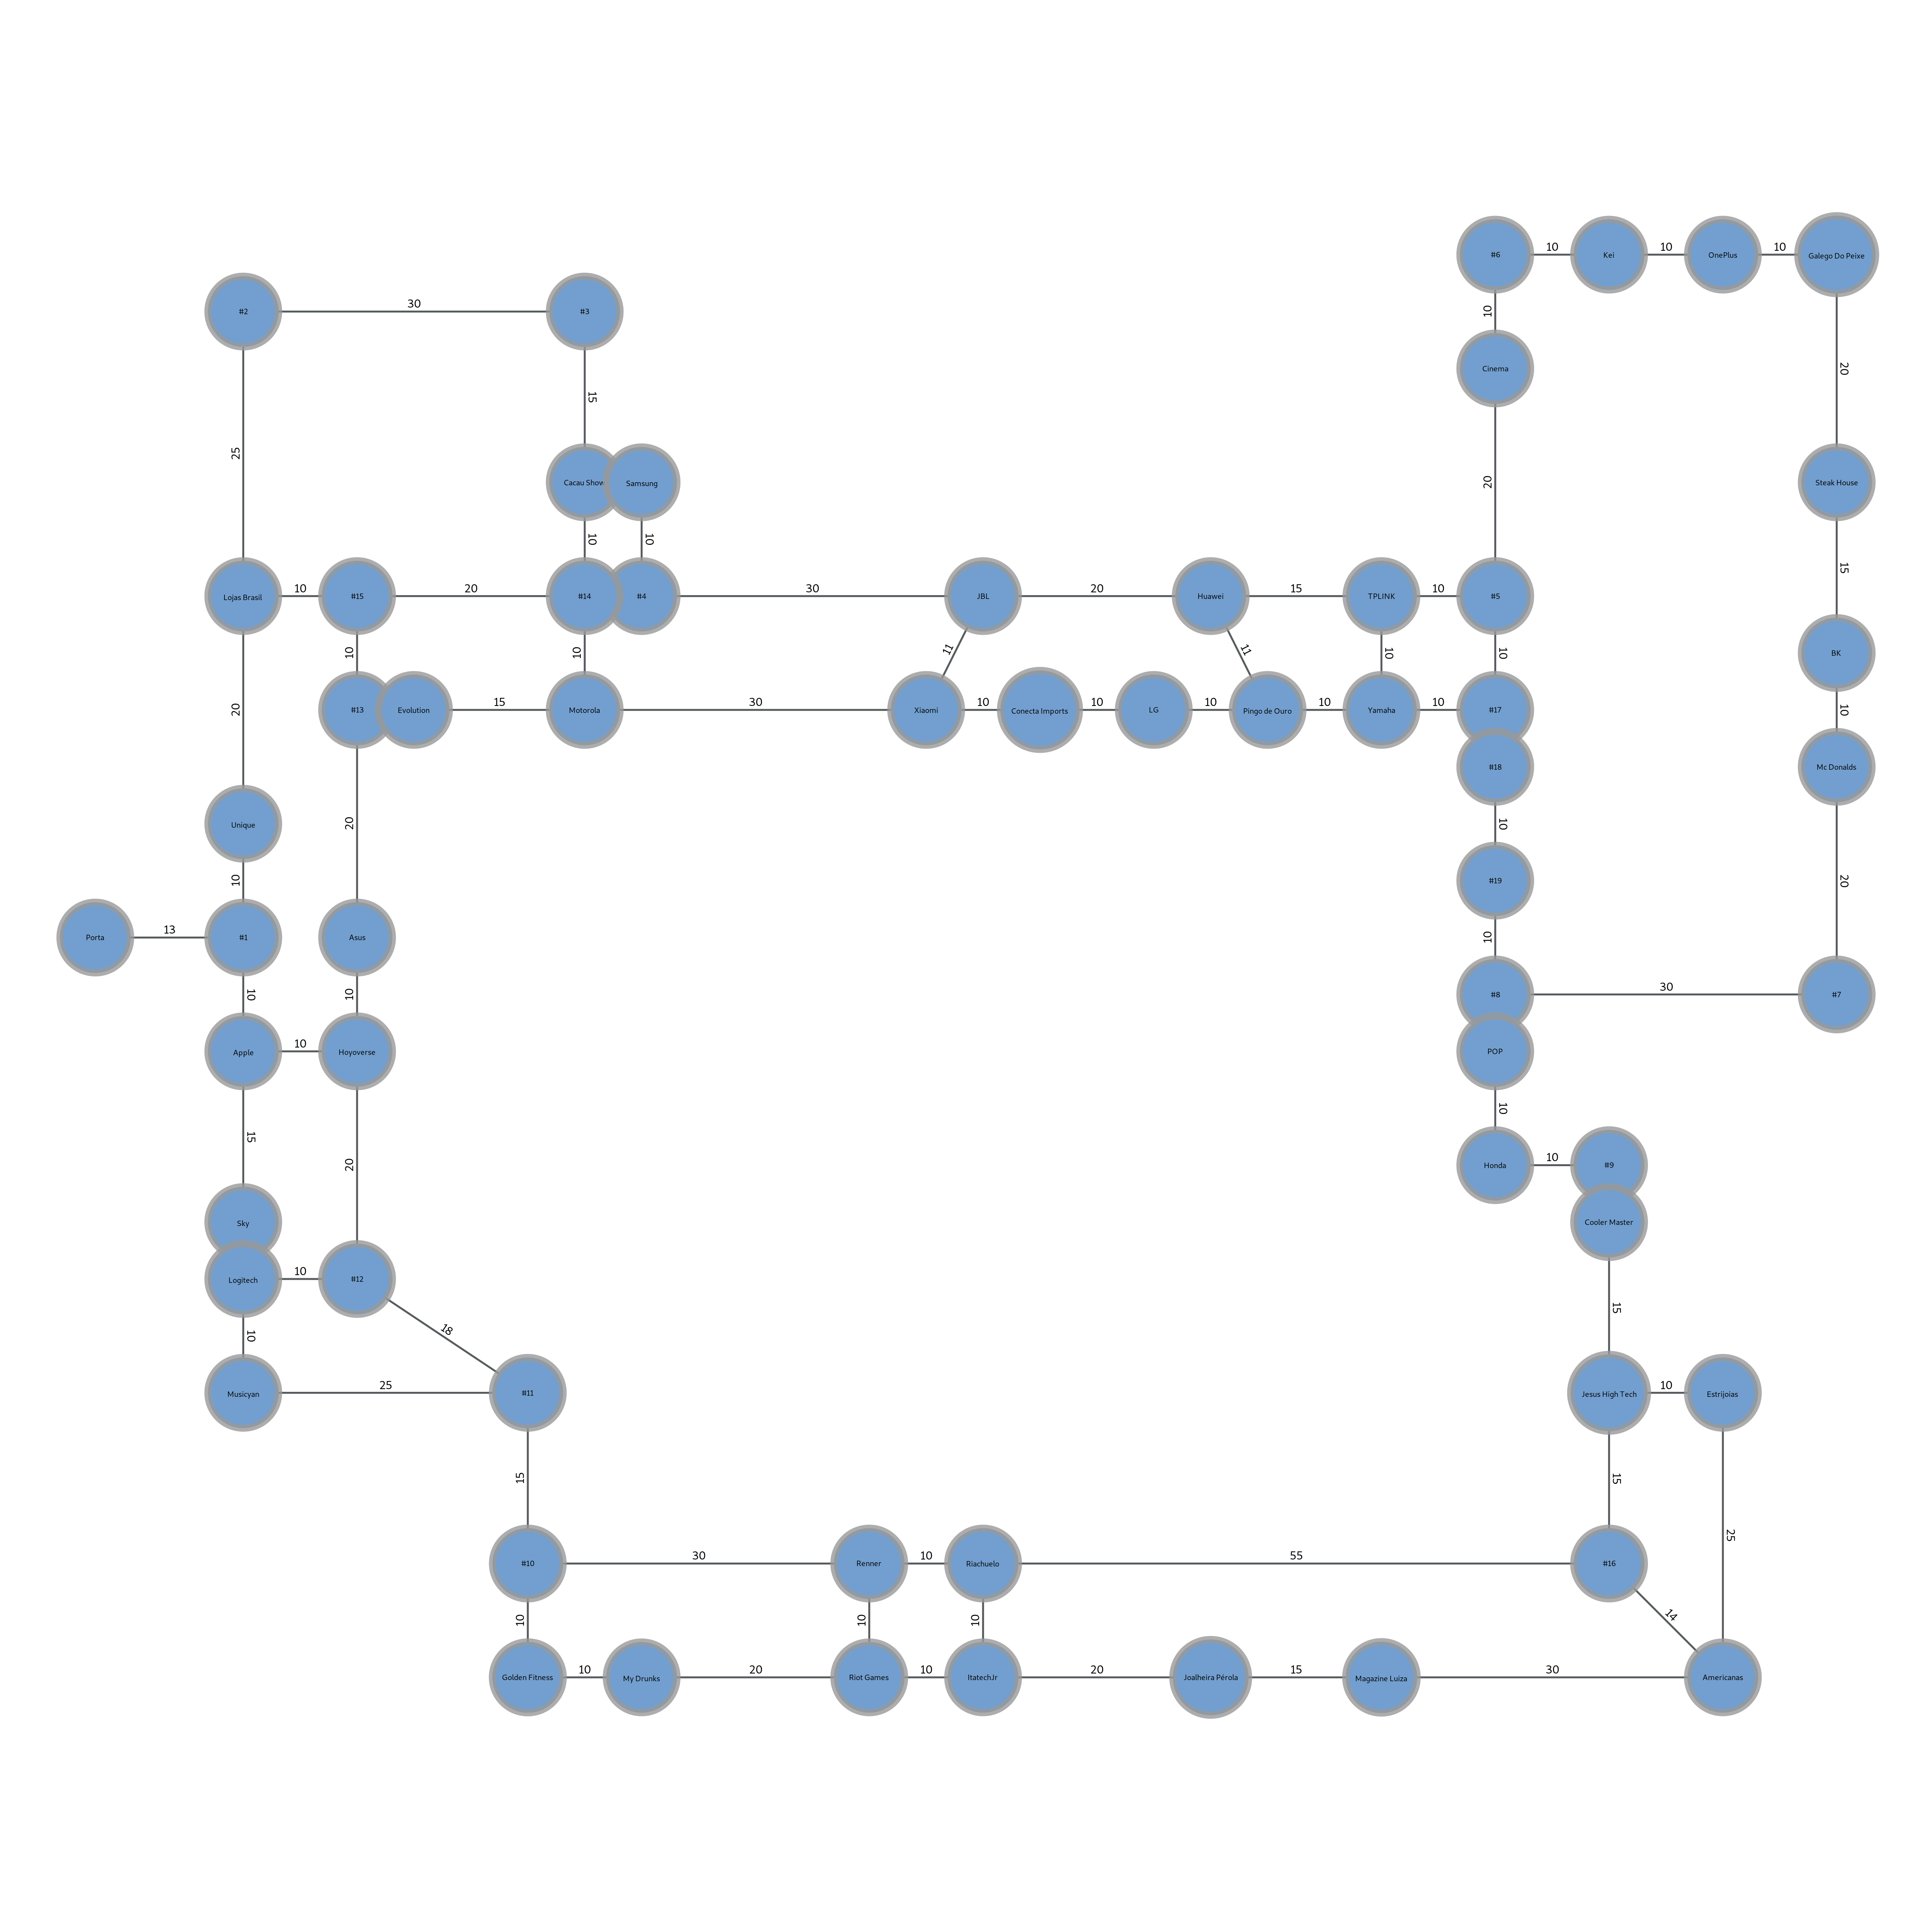

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fddf0b96278, at 0x7fddf8052c50>

In [1]:
import graph_tool.all as gt                       # Biblioteca para GRAFO
import csv                                        # Biblioteca para Leitura do csv

g = gt.Graph() 
g.set_directed(False)                             # criação do objeto
v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string  
v_pos  = g.new_vertex_property("vector<double>")
e_distance = g.new_edge_property("string") 
e_weight = g.new_edge_property("float")  
e_action = g.new_edge_property("string") 
#bfsv_color = g_astar.new_vertex_property("string")      # referenciação da lista v_color com uma nova propriedade do vértice para a cor - tipo string  
#bfse_color = g_astar.new_edge_property("string")  

#Criação dos vértices no grafo à partir do arquivo .csv de vértices
f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")

vposX = []
vposY = []
heuristic = [] #heuristica para algum ponto
for vertice in reader_network:
    v = g.add_vertex()
    v_name[v] = str(vertice[1]) # Adicionando nome do vertice
    vposX.append(vertice[5]) # Adicionando posição X
    vposY.append(vertice[6]) # Adicionando posição Y
f_network.close()

#Criação das arestas no grafo à partir do arquivo .cvs de arestas
f_network = open("arestas.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for edge in reader_network:
    e = g.add_edge(int(edge[0]), int(edge[1]))
    #Se quiser que a distancia tenha mais influencia, alterar esse index para 3
    #Se quiser que o peso tenha mais influência, alterar para 2
    e_weight[e] = float(edge[2])
    print("pesos")
    print(e_weight[e])
    e_distance[e] = str(edge[3])
   
f_network.close()

#print("lista de peso")
#for a in e_weight:
#    print(a)

#print(" > Lista de Transições: ",g.get_edges())


#Preenchendo as posições X e Y dos vértices
for v in g.vertices():
    v_pos[v] = (vposX[int(v)],vposY[int(v)])
    

gt.graph_draw(g, pos=v_pos, #pos=gt.arf_layout(visual_G),
               vertex_text= v_name,
               edge_text = e_distance,
               edge_pen_width = 5,  
               vertex_font_size=20,
               edge_font_size = 30,
               vertex_shape="circle",
               vertex_fill_color="#729fcf",
               output_size=(5000, 5000))
               #output="two-nodes.png")

In [2]:
import math
heuristic = []
def DistanciaEuclidiana(v, target):
    #valor = float((((int(vposX[target]) - int(vposX[v]))**2) +  (int(vposY[target]) - int(vposY[v]))**2)) 
    valor = (float(vposX[v]) - float(vposX[target]))**2 + (float(vposY[v]) - float(vposY[target]))**2
    return math.sqrt(valor)

def PrenncherHeuristica(target):
    for v in v_name:         
        index_atual = list(v_name).index(v)
        print(v, index_atual)
        print(DistanciaEuclidiana(index_atual, target))
        heuristic.append(DistanciaEuclidiana(index_atual, target))
       
def he(v): 
    return heuristic[v]


PrenncherHeuristica(57) #erro estava no valor de destino, sempre que
                        #muda o destino trocar esse valor do parametro
i = 0
for h in heuristic: 
    print(str(list(v_name).index(v_name[i])) + " -> " + v_name[i] + " -> " + str(h))
    print(" ")
    i+=1
      
    
print("==== teste ====")
print(DistanciaEuclidiana(2,57))
print(list(v_name).index("Porta"))





    

Porta 0
114.75626344561765
#1 1
101.9803902718557
Unique 2
100.4987562112089
Lojas Brasil 3
100.4987562112089
#2 4
105.94810050208545
#3 5
78.26237921249263
Cacau Show 6
72.80109889280519
Samsung 7
68.00735254367721
#4 8
65.76473218982953
JBL 9
36.40054944640259
Huawei 10
18.027756377319946
TPLINK 11
10.0
#5 12
14.142135623730951
Cinema 13
31.622776601683793
#6 14
41.23105625617661
Kei 15
44.721359549995796
OnePlus 16
50.0
Galego Do Peixe 17
56.568542494923804
Steak House 18
44.721359549995796
BK 19
40.311288741492746
Mc Donalds 20
40.311288741492746
#7 21
47.16990566028302
#8 22
26.92582403567252
POP 23
31.622776601683793
Honda 24
41.23105625617661
#9 25
44.721359549995796
Cooler Master 26
49.24428900898052
Jesus High Tech 27
63.245553203367585
Estrijoias 28
67.08203932499369
Americanas 29
90.13878188659973
Magazine Luiza 30
85.0
Joalheira Pérola 31
86.31338250816034
ItatechJr 32
91.92388155425118
Riot Games 33
96.17692030835673
My Drunks 34
107.00467279516349
Golden Fitness 35
113.35

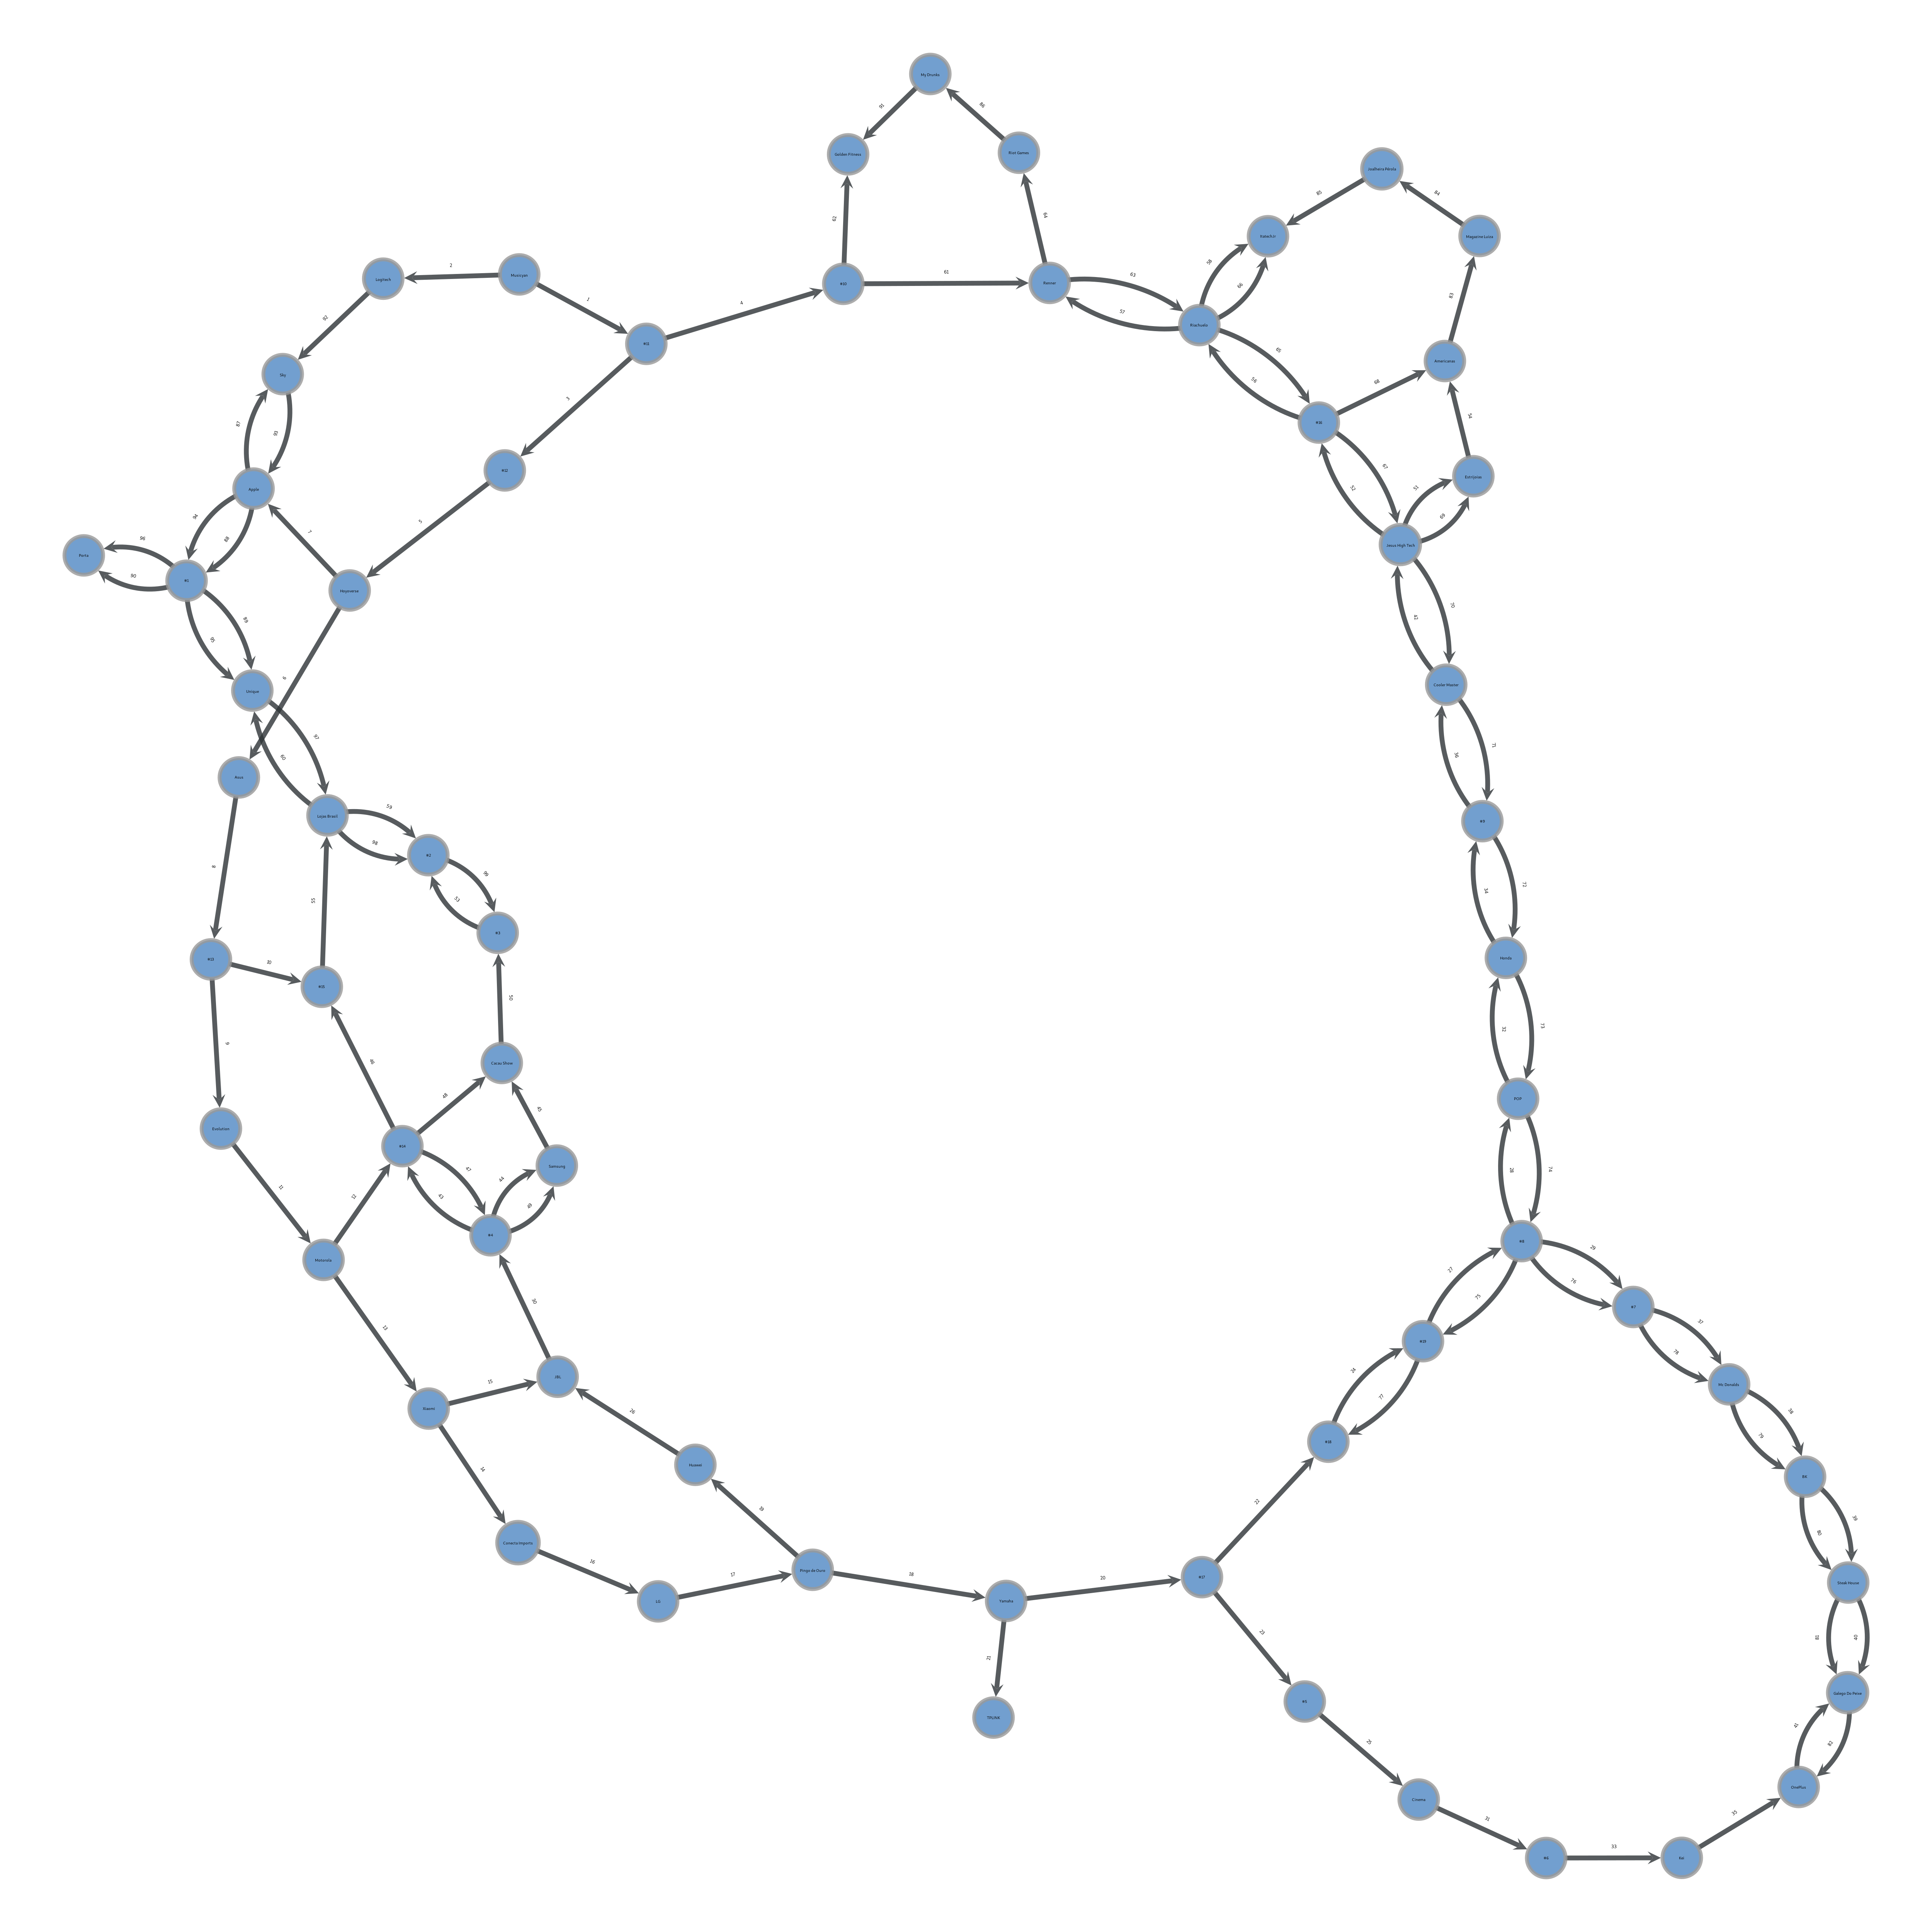

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fddf804fa90, at 0x7fddbd98e5c0>

In [3]:
import graph_tool.all as gt                           # Biblioteca para GRAFO
g_astar = gt.Graph()                                    # criação do objeto para busca em Largura
v_name_dfs = g_astar.new_vertex_property("string")      # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string 
e_ord = g_astar.new_edge_property("int")                # referenciação da lista e_ord com uma nova propriedade criada para a ordem de expansão - tipo int
e_action_bfs = g_astar.new_edge_property("string")

f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for vertice in reader_network:
    v = g_astar.add_vertex()
    v_name_dfs[v] = str(vertice[1])
 
f_network.close()

raiz = 'Porta'
index_raiz = list(v_name).index(raiz)
ord = 1


for edge in gt.astar_iterator(g, g.vertex( 52), e_weight, heuristic=lambda v: he(int(v))):
   e = g_astar.add_edge(int(edge.source()), int(edge.target()))
   e_ord[e] = ord
   e_action_bfs[e] = '(' + str(ord) + ') ' #+ e_action[g.edge(int(edge.source()), int(edge.target()))] 
   ord += 1


size = 5000
v_size = size / 50
e_pwidth = v_size / 8
gt.graph_draw(g_astar,#pos=gt.sfdp_layout(g_bfs),
              vertex_size = v_size,
              vertex_text= v_name_dfs,
              edge_text= e_ord,
              vertex_font_size=10,
              edge_font_size = 12,
              edge_pen_width = e_pwidth,
              vertex_shape="circle",
              vertex_fill_color="#729fcf",
              output_size=(size, size))
              #output="two-nodes.png")      
                                   


In [4]:
class VisitorExample(gt.AStarVisitor):                                            # É um objeto visitante que é chamado nos pontos de evento dentro do algoritmo bfs_search()
    def __init__(self, name, time, name_time, v_color, dist, pred, e_color, e_action, e_ord, target):
        self.name = name
        self.time = time
        self.name_time = name_time
        self.fill_color = v_color
        self.dist = dist
        self.pred = pred
        self.color = e_color
        self.e_action = e_action
        self.e_ord = e_ord
        self.e_count = 0
        self.last_time = 0
        self.target = target
        
    def discover_vertex(self, u):                                               # Invocado quando um vértice é encontrado pela primeira vez.
        self.name[u] = v_name[u]
        self.time[u] = self.last_time
        self.last_time += 1        
        self.name_time[u] = str(self.name[u]) + "(" + str(self.time[u]) + ")"
        print("-->", self.name[u], "foi encontrado e entrou na FILA") 
        self.fill_color[u] = "white"

    def examine_vertex(self, u):                                                # Invocado em um vértice à medida que é retirado da fila. 
        print("   ",self.name[u], "saiu da FILA e está sendo analisado (expandido)...") 

    def examine_edge(self, e):                                                  # Invocado em cada aresta de cada vértice depois de descoberto.
        print("    Aresta (%s, %s) em análise..." %               (v_name[e.source()], v_name[e.target()]))
        
    def edge_relaxed(self, e):                                                  #Após o exame do vértices, este método é invocado. 
        
        self.pred[e.target()] = int(e.source())                                 
        self.dist[e.target()] = self.dist[e.source()] + 1
        e = g_astar.add_edge(int(e.source()), int(e.target()))
        self.color[e] = "gray"
        self.e_action[e] = e_action[g.edge(int(e.source()), int(e.target()))]
        self.e_count += 1
        self.e_ord[e] = self.e_count
        print("    Após análise, aresta (%s, %s) mantida." %             (v_name[e.source()], v_name[e.target()]))
       
    def finish_vertex(self, u):
        print("    > Todos os vértices adjacentes à", self.name[u], "foram descobertos!\n") 


--> Musicyan foi encontrado e entrou na FILA
    Musicyan saiu da FILA e está sendo analisado (expandido)...
    Aresta (Musicyan, #11) em análise...
    Após análise, aresta (Musicyan, #11) mantida.
--> #11 foi encontrado e entrou na FILA
    Aresta (Musicyan, Logitech) em análise...
    Após análise, aresta (Musicyan, Logitech) mantida.
--> Logitech foi encontrado e entrou na FILA
    > Todos os vértices adjacentes à Musicyan foram descobertos!

    #11 saiu da FILA e está sendo analisado (expandido)...
    Aresta (#11, #12) em análise...
    Após análise, aresta (#11, #12) mantida.
--> #12 foi encontrado e entrou na FILA
    Aresta (#11, Musicyan) em análise...
    Aresta (#11, #10) em análise...
    Após análise, aresta (#11, #10) mantida.
--> #10 foi encontrado e entrou na FILA
    > Todos os vértices adjacentes à #11 foram descobertos!

    #12 saiu da FILA e está sendo analisado (expandido)...
    Aresta (#12, Hoyoverse) em análise...
    Após análise, aresta (#12, Hoyoverse) ma

    Aresta (OnePlus, Galego Do Peixe) em análise...
    Após análise, aresta (OnePlus, Galego Do Peixe) mantida.
    Aresta (OnePlus, Kei) em análise...
    > Todos os vértices adjacentes à OnePlus foram descobertos!

    Cooler Master saiu da FILA e está sendo analisado (expandido)...
    Aresta (Cooler Master, Jesus High Tech) em análise...
    Após análise, aresta (Cooler Master, Jesus High Tech) mantida.
--> Jesus High Tech foi encontrado e entrou na FILA
    Aresta (Cooler Master, #9) em análise...
    > Todos os vértices adjacentes à Cooler Master foram descobertos!

    Galego Do Peixe saiu da FILA e está sendo analisado (expandido)...
    Aresta (Galego Do Peixe, Steak House) em análise...
    Aresta (Galego Do Peixe, OnePlus) em análise...
    > Todos os vértices adjacentes à Galego Do Peixe foram descobertos!

    #4 saiu da FILA e está sendo analisado (expandido)...
    Aresta (#4, JBL) em análise...
    Aresta (#4, #14) em análise...
    Após análise, aresta (#4, #14) manti

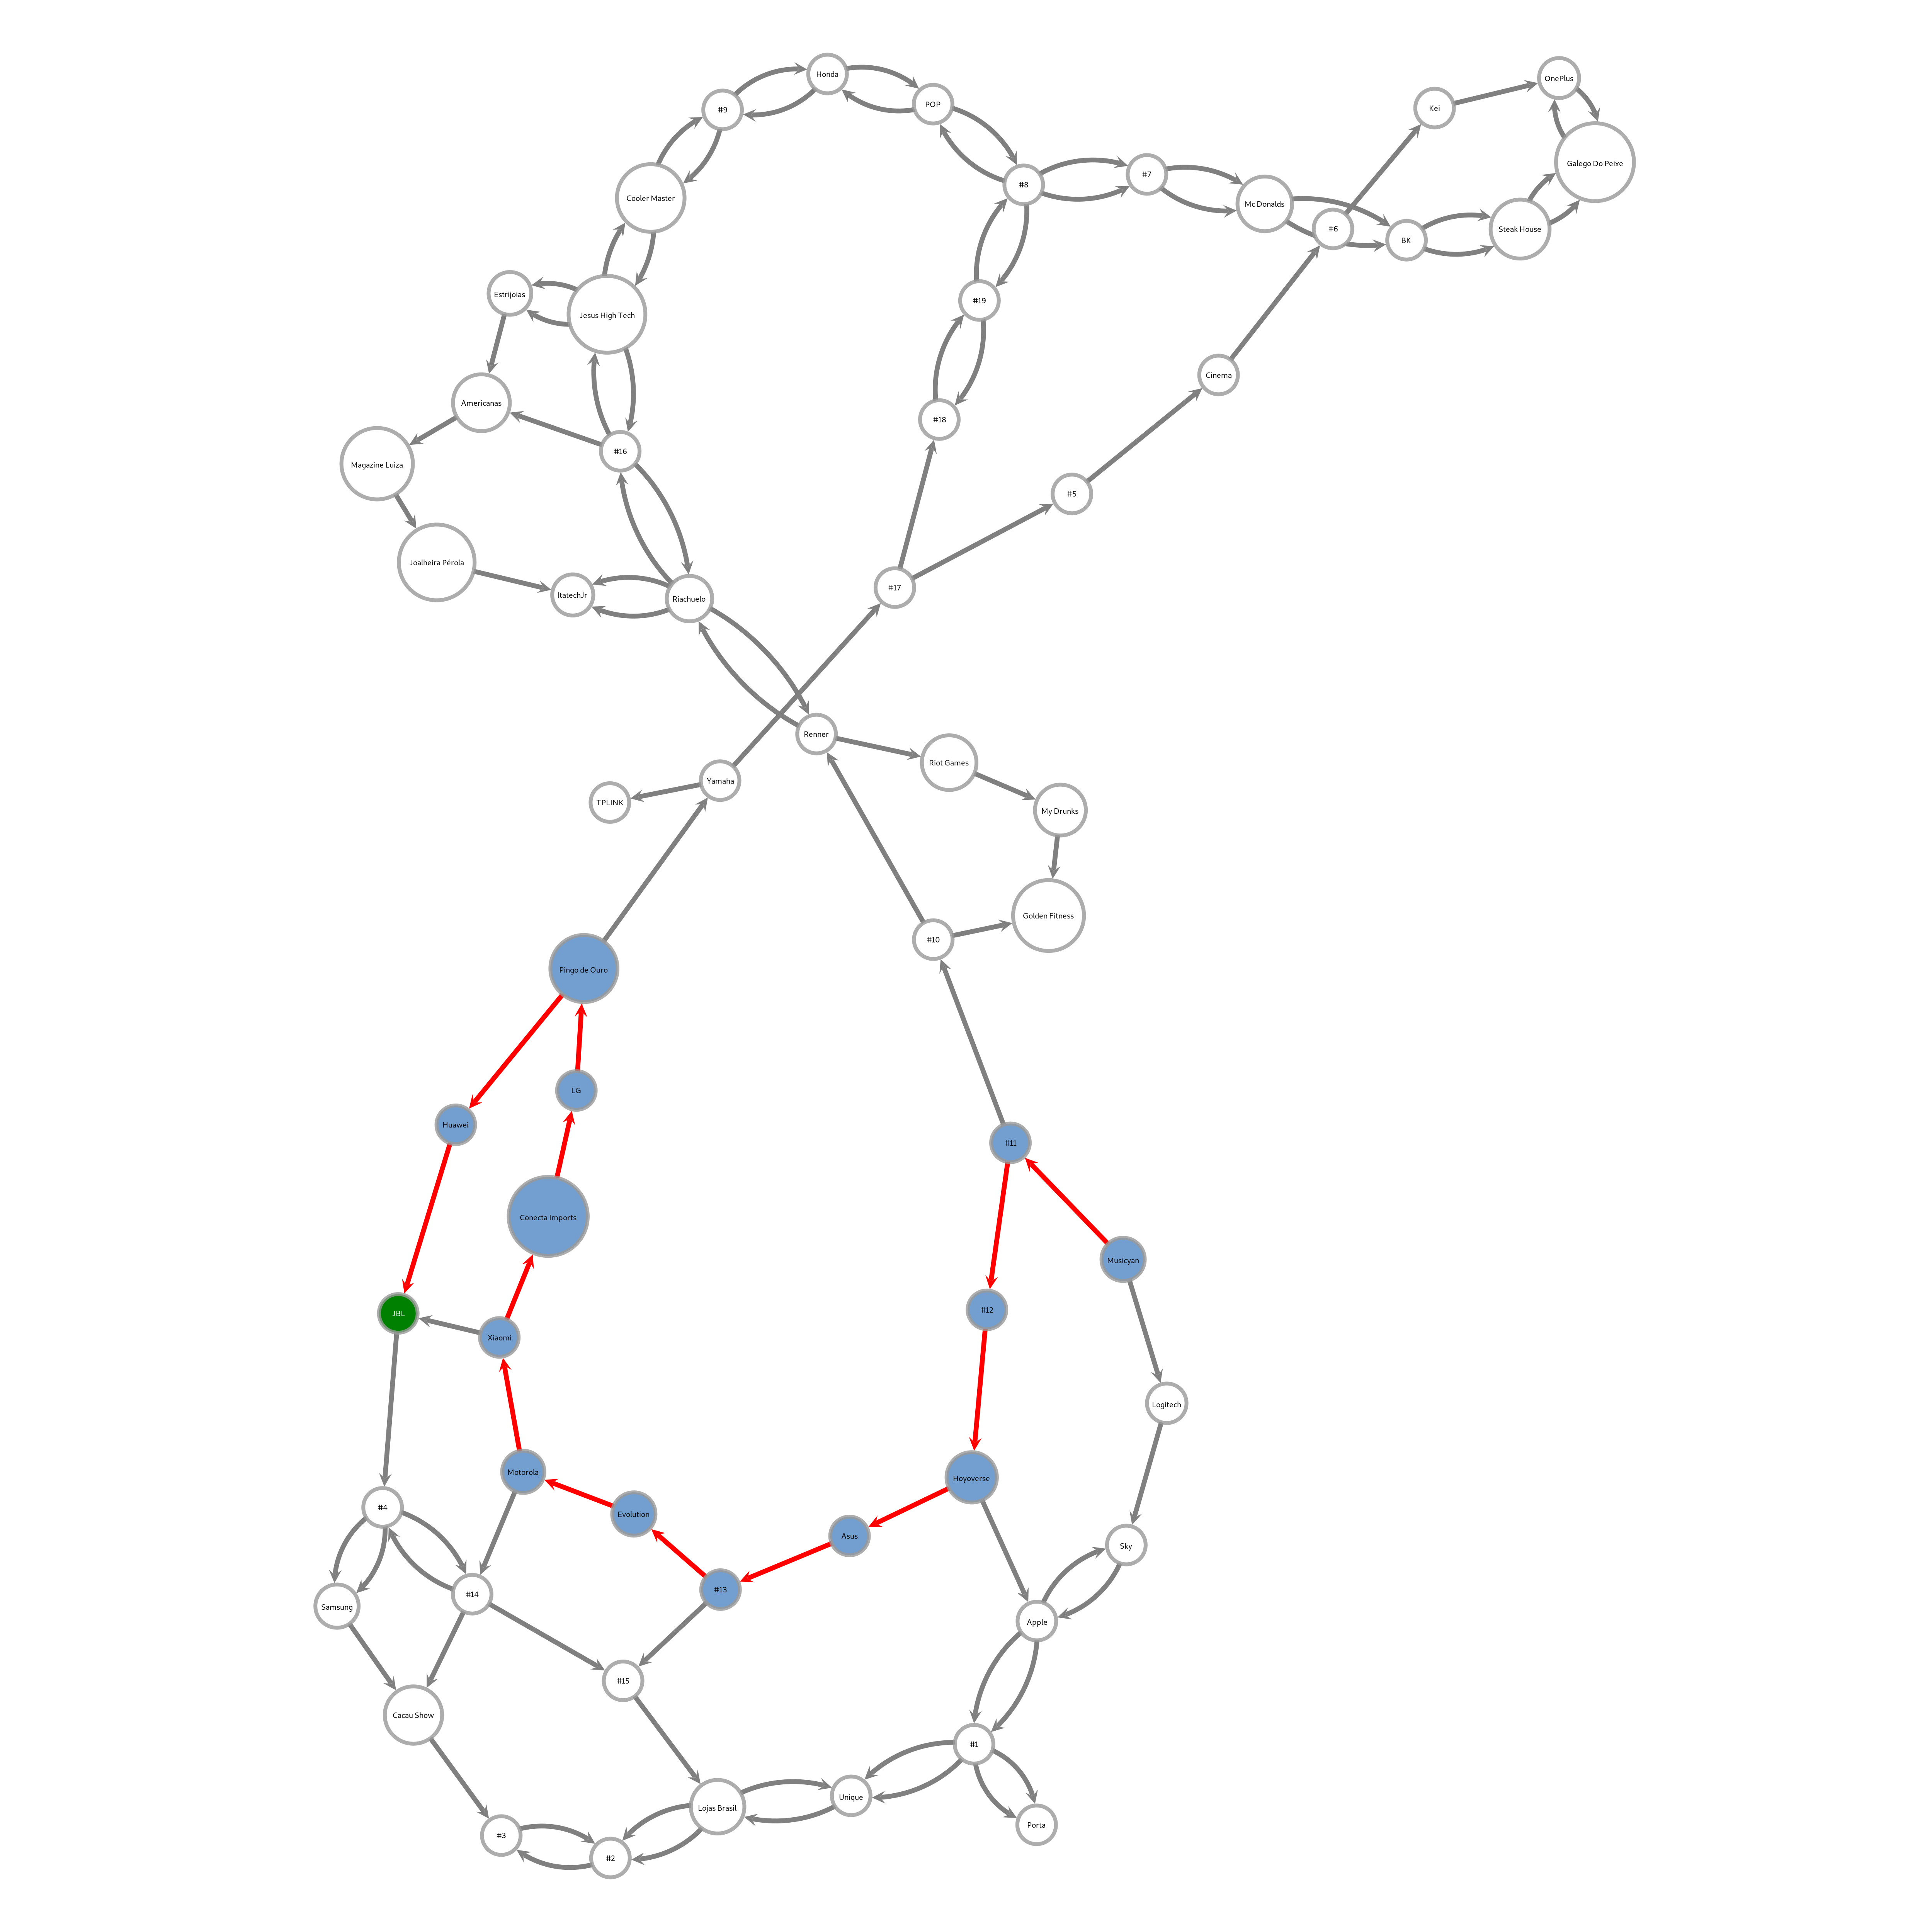

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fddf8052978, at 0x7fddbd883cc0>

In [5]:
import graph_tool.all as gt  

g_astar = gt.Graph()                                      # criação do objeto para busca A Estrela
bfsv_name = g_astar.new_vertex_property("string")      # referenciação da lista v_name_bfs com uma nova propriedade do vértice para o nome - tipo string 
bfsv_time = g_astar.new_vertex_property("int")         # referenciação da lista v_time com uma nova propriedade do vértice para a ordem de expansão - tipo int
bfsv_name_time = g_astar.new_vertex_property("string")      # referenciação da lista v_name_time com uma nova propriedade do vértice para o nome e ordem de expansão - tipo string
bfsv_color = g_astar.new_vertex_property("string")      # referenciação da lista v_color com uma nova propriedade do vértice para a cor - tipo string  
bfsv_dist = g_astar.new_vertex_property("int")         # referenciação da lista v_dist como uma propriedade do vértice criada para a distância da raiz
bfsv_pred = g_astar.new_vertex_property("int64_t")     # referenciação da lista v_pred como uma propriedade do vértice para referenciar o predecessor (pai)
bfse_color = g_astar.new_edge_property("string")        # referenciação da lista e_color com uma nova propriedade da aresta para a cor - tipo string  
bfse_action = g_astar.new_edge_property("string")        # referenciação da lista e_action_bfs com uma nova propriedade da aresta para a ação - tipo string
bfse_ord = g_astar.new_edge_property("string")        # referenciação da lista e_action_bfs com uma nova propriedade da aresta para a ação - tipo string
bfse_weight_bfs = g_astar.new_edge_property("float")       # referenciação da lista e_weight com uma nova propriedade criada para a função g(n) - tipo float
v_pos  = g.new_vertex_property("vector<double>")


raiz = 'Porta'
alvo = 'Yamaha'
index_raiz = 52
index_alvo = 9


gt.astar_search(g, g.vertex(index_raiz), e_weight, VisitorExample(bfsv_name, bfsv_time, bfsv_name_time, bfsv_color, 
                                    bfsv_dist, bfsv_pred, bfse_color, bfse_action, bfse_ord, g.vertex(index_alvo)), heuristic=lambda v: he(int(v))) #, heuristic=lambda v: h(index_raiz, index_alvo)

#print(list(bfsv_name).index(alvo))
print(list(bfsv_name)) #nao ta retornando para a lista
bfsv_color[index_alvo] = "green"
path = []
id_caminho = []
id_caminho.insert(0, index_alvo)

while index_alvo != index_raiz:
  e = g_astar.edge(bfsv_pred[index_alvo], index_alvo)
  if e is None:
    break;
  bfse_color[e] = "red"
  index_alvo = bfsv_pred[index_alvo]
  path.insert(0,bfsv_name[index_alvo])
  id_caminho.insert(0, index_alvo)
  bfsv_color[index_alvo] = "#729fcf"


    
print(id_caminho)
    
size = 5000
v_size = size / 50
e_pwidth = v_size / 8
gt.graph_draw(g_astar, #pos=v_pos,
              vertex_size = v_size,
              vertex_text= bfsv_name,
              edge_color= bfse_color,
              vertex_font_size=20,
              edge_font_size = 8,
              edge_pen_width = e_pwidth,
              vertex_fill_color=bfsv_color,              
              vertex_shape="circle",
              #vertex_fill_color="#729fcf",
              output_size=(size, size)) 

Caminho:
JBL
Huawei
#11
#12
Hoyoverse
Asus
#13
Evolution
Motorola
Musicyan
Xiaomi
Conecta Imports
LG
Pingo de Ouro
215.0


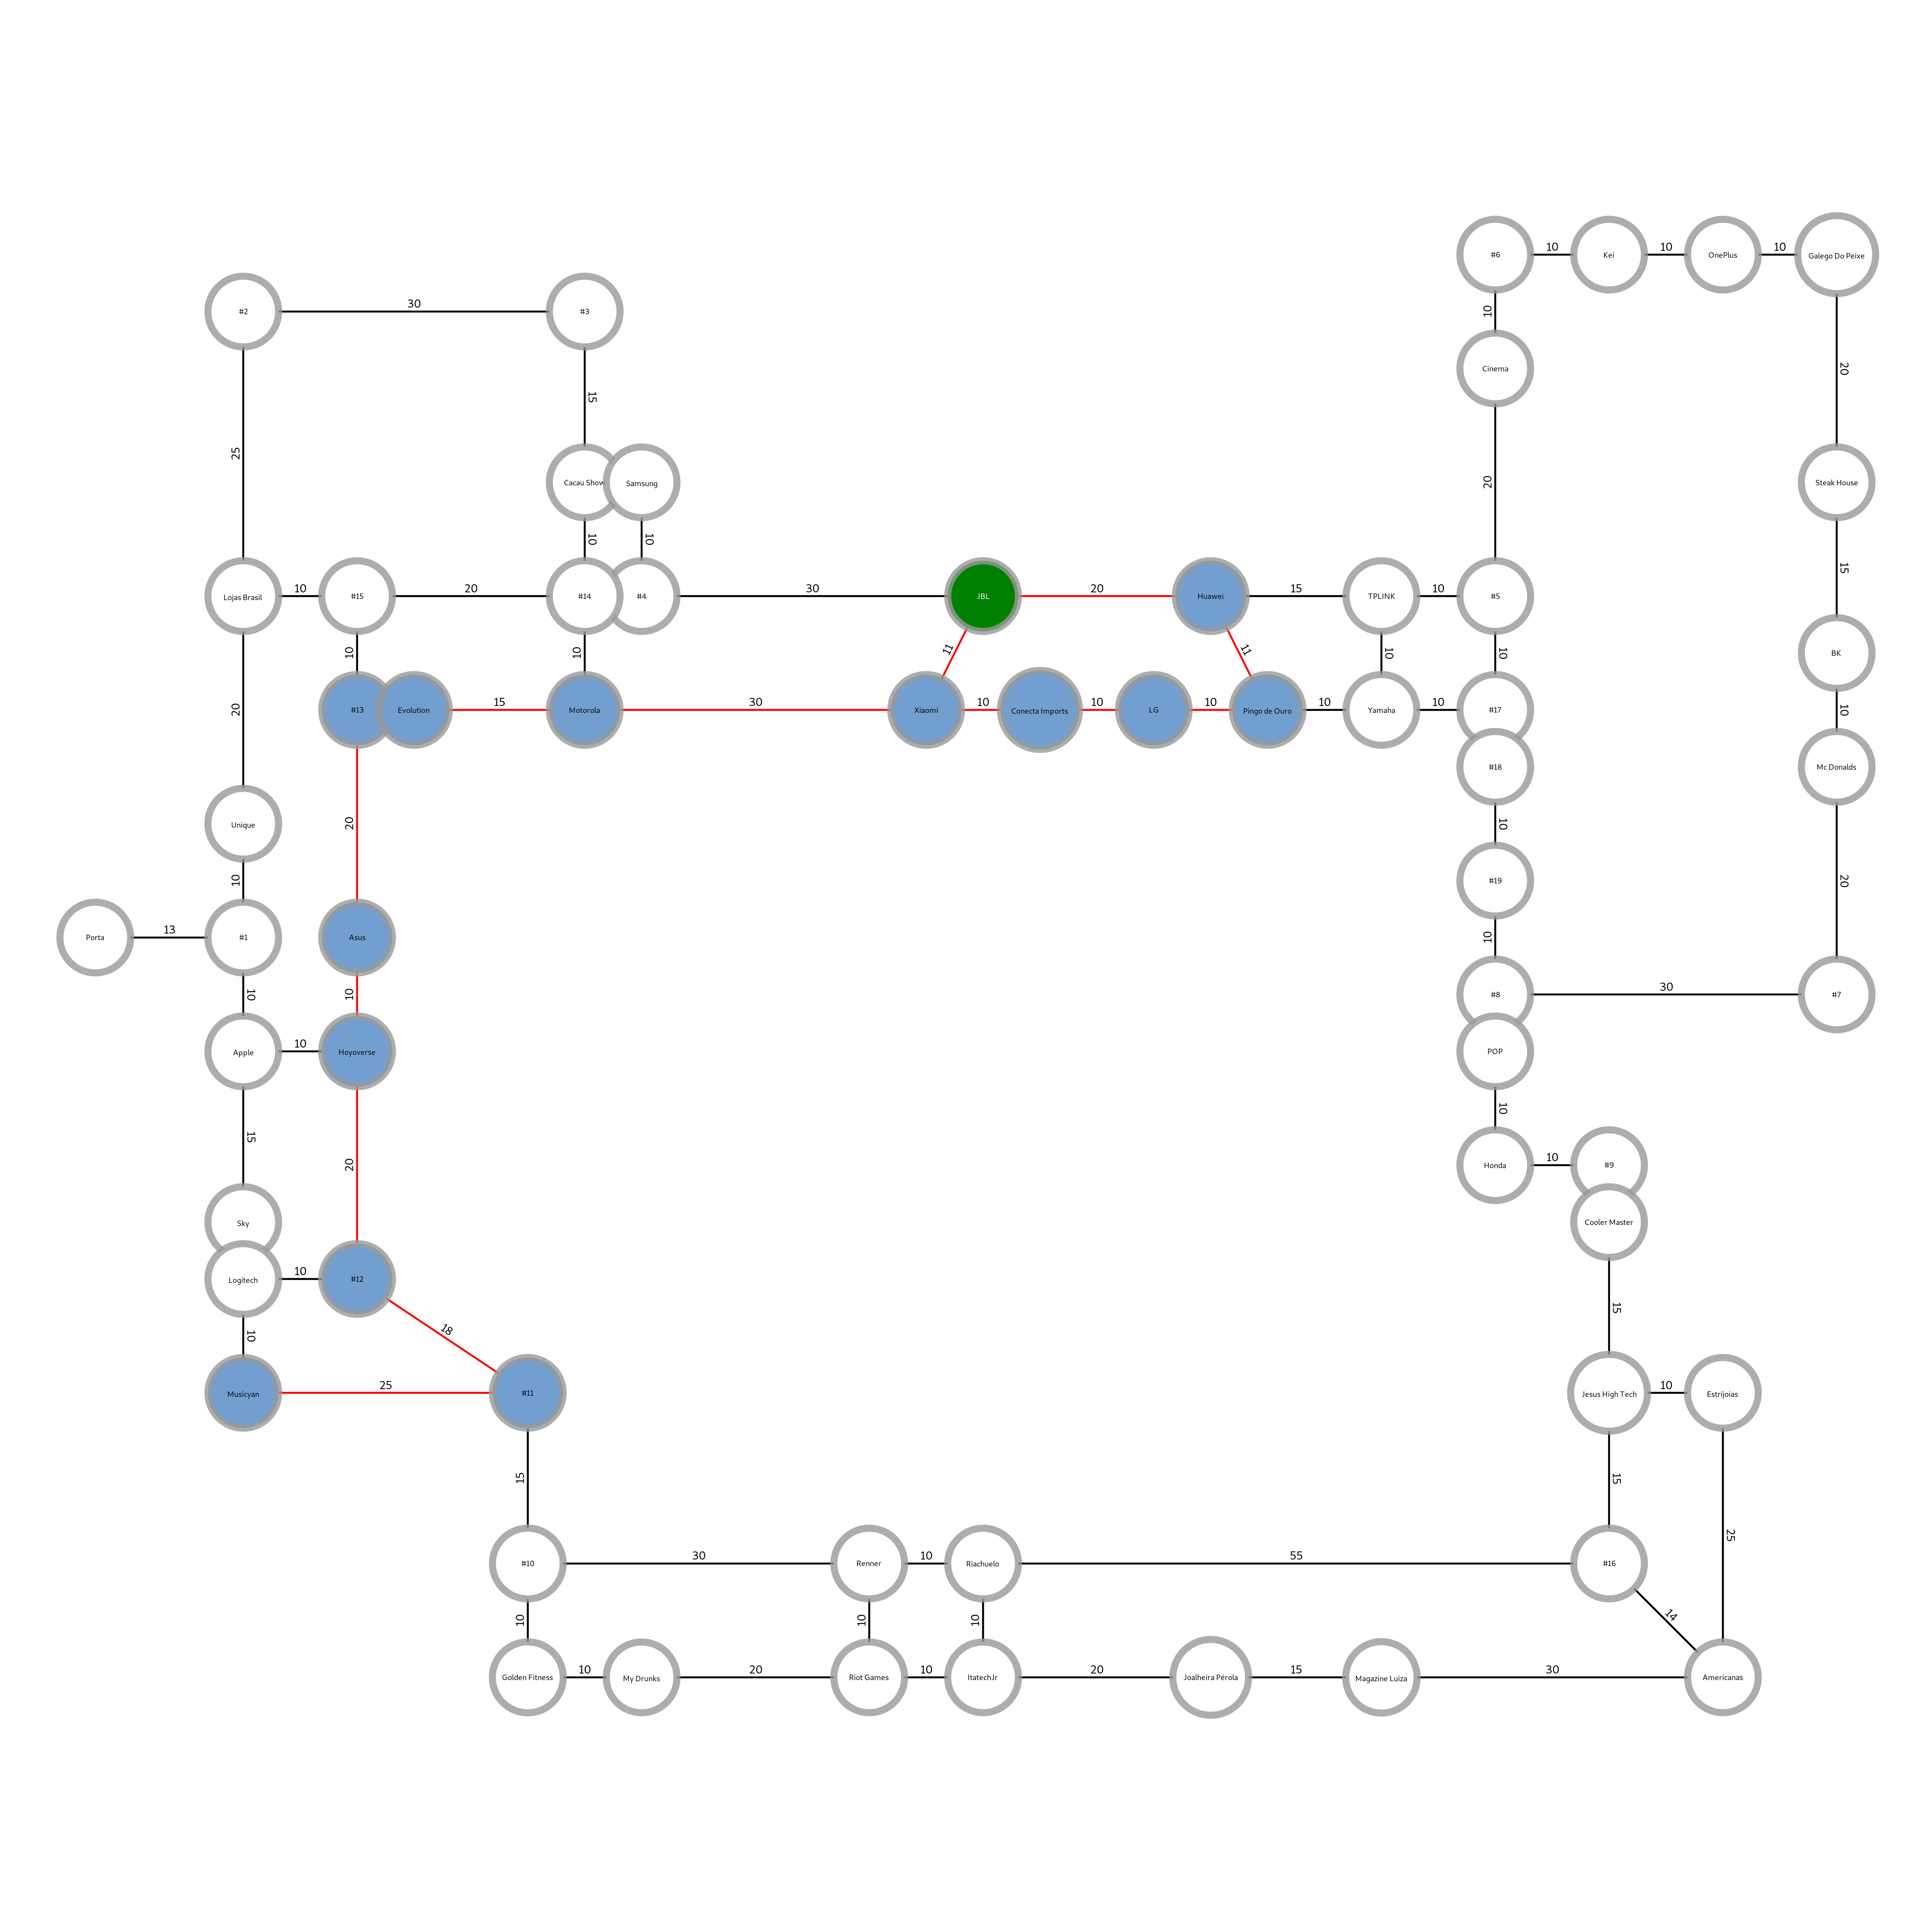

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fddbd883438, at 0x7fddb7bdc9e8>

In [6]:
import graph_tool.all as gt                       # Biblioteca para GRAFO
import csv                                        # Biblioteca para Leitura do csv
g = gt.Graph() 
g.set_directed(False)                             # criação do objeto
v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string  
v_pos  = g.new_vertex_property("vector<double>")
e_distance = g.new_edge_property("string") 
e_weight = g.new_edge_property("float")  
e_action = g.new_edge_property("string") 
bfse_color = g.new_edge_property("string")  
bfsv_color = g.new_vertex_property("string") 

#Criação dos vértices no grafo à partir do arquivo .csv de vértices
f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")

vposX = []
vposY = []
distancias = []
for vertice in reader_network:
    v = g.add_vertex()
    v_name[v] = str(vertice[1]) # Adicionando nome do vertice
    vposX.append(vertice[5]) # Adicionando posição X
    vposY.append(vertice[6]) # Adicionando posição Y
f_network.close()


#Criação das arestas no grafo à partir do arquivo .cvs de arestas
f_network = open("arestas.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for edge in reader_network:
    e = g.add_edge(int(edge[0]), int(edge[1]))
    bfse_color[e] = "black"
    e_weight[e] = float(edge[2])
    e_distance[e] = str(edge[3])
   
f_network.close()


#Preenchendo as posições X e Y dos vértices
for v in g.vertices():
    v_pos[v] = (vposX[int(v)],vposY[int(v)])
#Pintando os vertices
for v in g.vertices():
    bfsv_color[v] = "white"
#Pintando as arestas
for e in g.edges():
    bfse_color[e] = "black"
custo = 0   
#Pintando o caminho
destino = id_caminho[-1] #pegando o id do destino
print("Caminho:")
for v in g.vertices(): #Pegar os vertices
    if v in id_caminho:
        bfsv_color[v] = "#729fcf" 
        if v == destino:
            bfsv_color[v] = "green"      
        print(v_name[v])
        for edge in v.out_edges(): #retornar as arestas daquele vertice v
            if edge.target() in id_caminho: #target: retornar a arestar de destino daquele vertice
                bfse_color[edge] = "red"
                custo += float(e_distance[edge])
print(str(custo/2))
gt.graph_draw(g, pos=v_pos,
               vertex_text= v_name,
               edge_text = e_distance,
               edge_color= bfse_color,
               edge_pen_width = 5,  
               vertex_font_size=20,
               edge_font_size = 30,
               vertex_shape="circle",
               vertex_fill_color=bfsv_color,
               output_size=(5000, 5000))
               #output="two-nodes.png")